In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from funcionario import lagrange

# Excesso de dados

Já vimos que usar pontos demais para interpolar pode trazer problemas:
ao usar um polinômio de grau muito grande, este pode oscilar demasiadamente;
ao considerar muitos dados com um pouco de erro, este pode ser magnificado pela interpolação.

Entretanto, possuir mais informação deveria nos dar **mais** entendimento sobre o nosso problema, não?
Vamos, aqui, tentar aproveitar estes dados suplementares de outra forma.

# Regressão linear

O primeiro exemplo desta técnica é a regressão linear.
Possuimos dados $(x_i,y_i)$ que estão "quase" alinhados.
Se desejássemos passar um polinômio por todos eles, entretanto, seríamos forçados a ter algo extremamente oscilante.
Mas podemos tentar achar uma reta que esteja "suficientemente perto" de todos (ou _a mais perto_ de todos).

In [4]:
np.random.seed(1)
a,b = np.random.rand(2)
xs = np.linspace(-1,1,30)
ys = a*xs + b + 0.1*np.random.rand(30)
a, b

(0.417022004702574, 0.7203244934421581)

## Exercício, em muitas partes:

### 1) Veja os dados

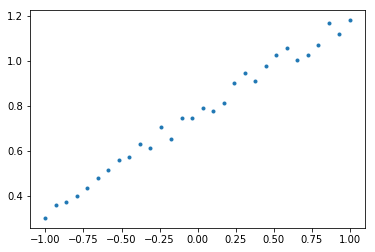

In [5]:
### Resposta aqui
plt.plot(xs,ys,'.')
plt.show()


### 2) Faça um gráfico do ajuste linear

In [6]:
# Estude a função polyfit
v = np.polyfit(xs,ys,deg=1)
### Resposta aqui
def poly(x,v):
    poly = 0
    vinv = v[::-1]
    for n,coef in enumerate(vinv):
        poly += coef*x**n
    return poly
    

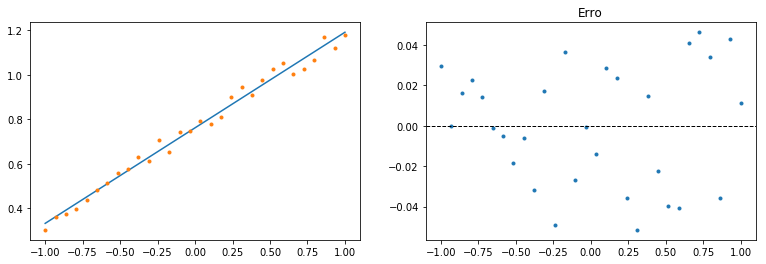

In [7]:
# Agora, faça o gráfico do ajuste, e do erro
_, [ax1,ax2] = plt.subplots(ncols=2, figsize=(13,4))
### Resposta aqui
ax1.plot(xs,poly(xs,v))
ax1.plot(xs,ys,'.')

ax2.plot(xs,poly(xs,v)-ys,'.')
ax2.axhline(color='k', linewidth=1, linestyle='--')
ax2.set_title('Erro')
plt.show()

### 3) Compare com o polinômio interpolador de grau 29

In [8]:
pol_int = lagrange(xs,ys)

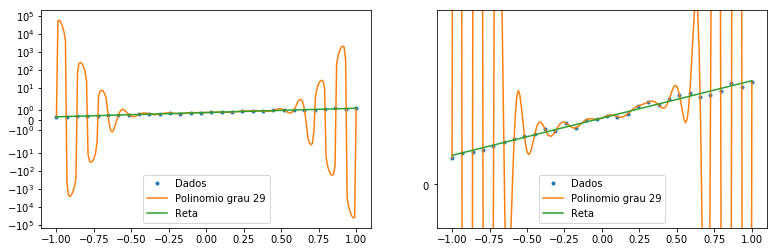

In [9]:
ts = np.linspace(-1,1,200)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(13,4))

### Resposta aqui
ax1.plot(xs,ys,'.',label = 'Dados')
ax1.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax1.plot(ts,poly(ts,v),label = 'Reta')
ax1.set_yscale('symlog')
ax1.legend()

ax2.plot(xs,ys,'.',label = 'Dados')
ax2.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax2.plot(ts,poly(ts,v),label = 'Reta')
ax2.set_yscale('symlog')
ax2.set_ylim(-1/2,2)
ax2.legend()
plt.show()

# Regressão polinomial

Podemos generalizar o procedimento que fizemos, e tentar ajustar um polinômio de grau mais alto.
Neste caso, não será provavelmente muito útil, mas vejamos o que acontece!

In [10]:
# Estude a função polyfit e polyval
coefs = np.polyfit(xs,ys,deg=4)
my_poly = np.polyval(coefs, xs)
coefs

array([-0.01791348, -0.00233291, -0.01722607,  0.43059742,  0.77203549])

### 4) Faça novamente um gráfico comparativo!

ValueError: not enough values to unpack (expected 3, got 2)

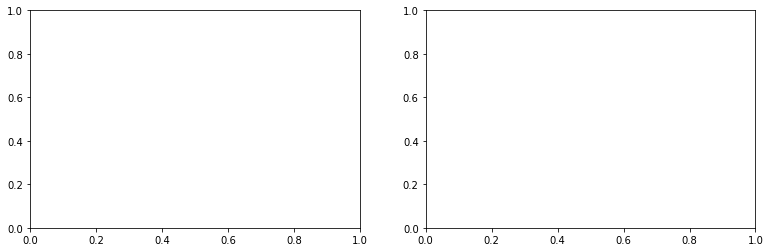

In [11]:
ts = np.linspace(-1,1,200)

_, [ax1, ax2, ax3] = plt.subplots(ncols=2, figsize=(13,4))

### Resposta aqui
ax1.plot(xs,ys,'.',label = 'Dados')
ax1.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax1.plot(ts,poly(ts,v),label = 'Reta')
ax1.set_yscale('symlog')
ax1.legend()

ax2.plot(xs,ys,'.',label = 'Dados')
ax2.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax2.plot(ts,poly(ts,v),label = 'Reta')
ax2.set_yscale('symlog')
ax2.set_ylim(-1/2,2)
ax2.legend()
plt.show()

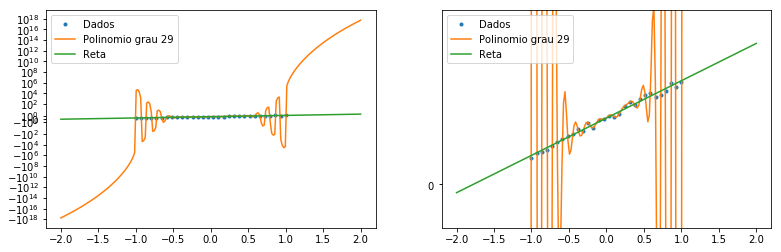

In [12]:
ts = np.linspace(-2,2,200)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(13,4))

### Resposta aqui
ax1.plot(xs,ys,'.',label = 'Dados')
ax1.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax1.plot(ts,poly(ts,v),label = 'Reta')
ax1.set_yscale('symlog')
ax1.legend()

ax2.plot(xs,ys,'.',label = 'Dados')
ax2.plot(ts,pol_int(ts),label = 'Polinomio grau 29')
ax2.plot(ts,poly(ts,v),label = 'Reta')
ax2.set_yscale('symlog')
ax2.set_ylim(-1/2,2)
ax2.legend()
plt.show()

# Modelos lineares gerais

O que está por trás da função `polyfit` é que temos um modelo que é _linear_ nos parâmetros que desejamos encontrar.
Um modelo pode ser pensado numa função $M_{par}(x)$, que dá uma aproximação para os pontos $(x_i, y_i)$.
Em geral, emprega-se uma notação como $y \sim M_{par}(x)$.

Por exemplo, se temos um modelo polinomial, os parâmetros são os coeficientes $p_i$ do polinômio,
e portanto $M_{par}(x) = \sum_{i=0}^d p_i x^i$.

Quando o modelo é linear nos parâmetros, ao escrevermos as 30 equações $M_{par}(x_k) = y_k$,
obtemos um sistema linear $A \cdot par = y$.
Se temos tantos parâmetros como equações (ou mais!), é razoável esperar que o sistema terá solução.
Mas, nos casos acima, estamos na situação exatamente oposta:
temos (muito!) menos variáveis do que equações,
e o sistema será, muito provavelmente, impossível.

Entretanto, podemos tentar encontrar coeficientes que sejam os "melhores possível"
segundo algum critério.
Um critério bastante comum e prático (ou seja, rápido para o computador executar)
é o de mínimos quadrados:

$$ \text{tomaremos $c$ tal que } \left\| Ac - y \right\| \text{ seja o menor possível.} $$

Para minimizar $\left\| Ac - y \right\|$, vamos minimizar o quadrado, o que torna o problema mais fácil, já que:

$$ \left\| Ac - y \right\|^2 = \langle Ac - y, Ac - y \rangle = c^T (A^T A) c - 2 c^T Ay + y^T y. $$

Derivando em relação a $c$, obtemos as chamadas equações normais:

$$ A^T A c = A^T y,$$

que agora formam um sistema com tantas equações quanto a dimensão de $c$.

## Exemplo: um modelo misto

Vamos criar "dados artificiais" para um modelo contendo tanto uma componente senoidal como uma exponencial e uma constante.
Depois, veremos como uma abordagem de mínimos quadrados se comporta.

Modelo artificial: $y \sim A \sin(2\pi t) + Be^{\lambda(t-1950)} + C$, com $\lambda = 0.03$.

In [24]:
# parâmetros
A = 20
B = 10
C = 150
l = 0.03

In [25]:
# dados artificiais
ts = np.arange(1950,2010,1/12)
ys = A*np.sin(2*np.pi*ts) + B*np.exp(l*(ts-1950)) + C

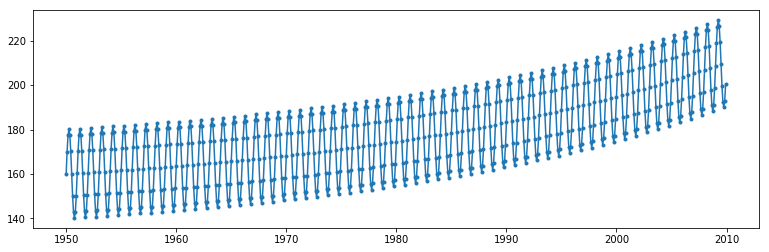

In [26]:
plt.figure(figsize=(13,4))
plt.plot(ts, ys, '.-')
plt.show()

### Exercício

Faça uma função que monta a matriz correspondente ao modelo.

In [88]:
def model_M(ts):
    # Retorna a matriz do sistema linear
    ### Resposta aqui
    def f(x): return np.sin(2*np.pi*x)
    def g(x): return np.exp(0.03*(x-1950))
    def h(x): return 1
    functions = [f,g,h]
    dim = len(ts)
    Matriz = []
    for i in range(dim):
        linha = [f(ts[i]) for f in functions]
        Matriz.append(linha)
    return np.array(Matriz)

In [89]:
M = model_M(ts)
M.shape

(720, 3)

E agora, encontre os parâmetros da série!

In [95]:
def model_par(ts,ys):
    # Calcula os parâmetros para os dados (t_i, y_i), resolvendo o sistema linear
    M = model_M(ts)
    #frst = np.dot(M.T,M)
    #scnd = M.T*ys
    #ret = np.linalg.solve(frst,scnd)
    #ret = np.linalg.lstsq(M.T,ys)
    #ys = np.array([ys])
    #ys.shape()
    frst = M.T @ M
    #scnd = np.dot(M.T,ys)
    
    ret = np.linalg.lstsq(M,ys)
    return ret[0]

model_par(ts,ys)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


array([ 20.,  10., 150.])

In [96]:
model_par(ts, ys)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


array([ 20.,  10., 150.])

# Dados reais!

Dados de emissão de $CO_2$, medidos em Mauna Loa.

In [13]:
dados = np.load('mounaloa.npz')
ts, ys = dados['ts'], dados['ys']

In [14]:
from matplotlib.mlab import movavg

In [15]:
ts_avg = movavg(ts,12)
ys_avg = movavg(ys,12)

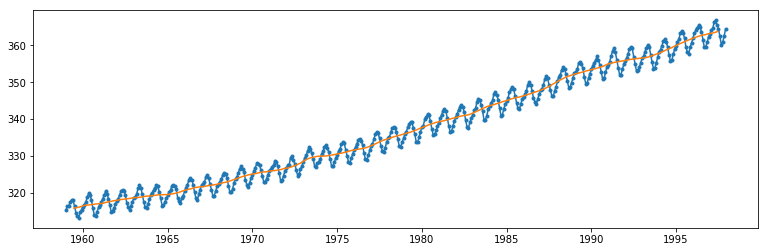

In [16]:
plt.figure(figsize=(13,4))
plt.plot(ts, ys, '.-')
plt.plot(ts_avg, ys_avg)
plt.show()

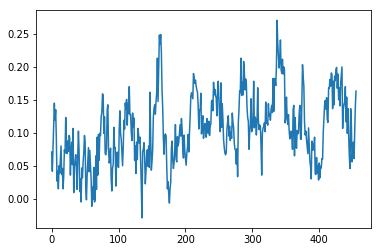

In [17]:
plt.plot(np.diff(ys_avg))
plt.show()

### Um modelo intermediário

Aqui, precisaríamos também estimar o $\lambda$.
Isso é relativamente complicado, e vamos começar aproximando a exponencial por um polinômio de grau 1.
Isso dá o seguinte modelo:

$$y \sim B\sin(2\pi t) + A(t-1959) + C. $$

In [23]:
def model_M(ts):
    # Monte a matriz
    ### Resposta aqui


def model_par(ts,ys):
    M = model_M(ts)
    MMt = np.matmul(M,M.T)
    return np.linalg.solve(MMt, np.dot(M,ys))

In [24]:
def model_fun(par):
    B,A,C = par
    def mf(t):
        # Função que avalia o modelo no tempo t
        ### Resposta aqui

    return mf

In [25]:
par = model_par(ts, ys)
mf = model_fun(par)
print(par)

[   2.77243676    1.31089805  311.5456345 ]


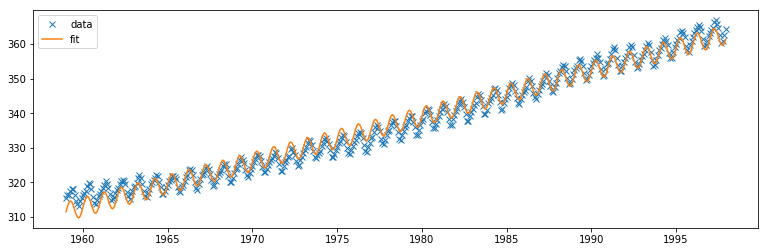

In [26]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys, 'x', label='data')
plt.plot(ts, mf(ts), label='fit')
plt.legend()
plt.show()

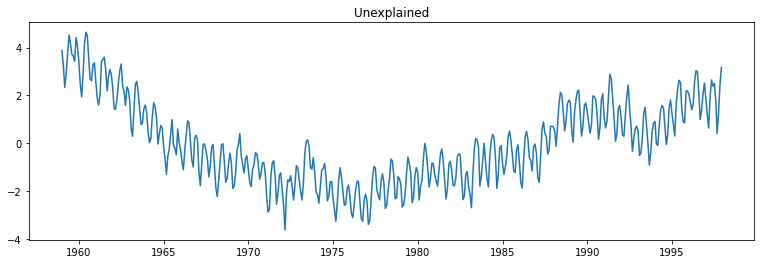

In [27]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys - mf(ts))
plt.title('Unexplained')
plt.show()

### Um modelo com mais parâmetros:

Vamos tentar ajustar melhor:
- introduzindo um termo $\cos(2\pi t)$,
- e aproximando a exponencial por um polinômio de grau 2.

Fica melhor?

In [28]:
def model_M(ts):
    # Monte a matriz
    ### Resposta aqui


def model_par(ts,ys):
    M = model_M(ts)
    MMt = np.matmul(M,M.T)
    return np.linalg.solve(MMt, np.dot(M,ys))

In [29]:
def model_fun(par):
    B,B_,A,A_,C = par
    def mf(t):
        # Função que avalia o modelo no tempo t
        ### Resposta aqui

    return mf

In [30]:
par = model_par(ts, ys)
mf = model_fun(par)
print(par)

[  2.77272785e+00  -3.90173283e-01   8.13949033e-01   1.27662811e-02
   3.14763660e+02]


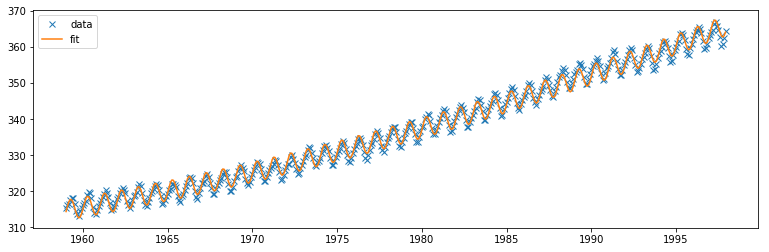

In [31]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys, 'x', label='data')
plt.plot(ts, mf(ts), label='fit')
plt.legend()
plt.show()

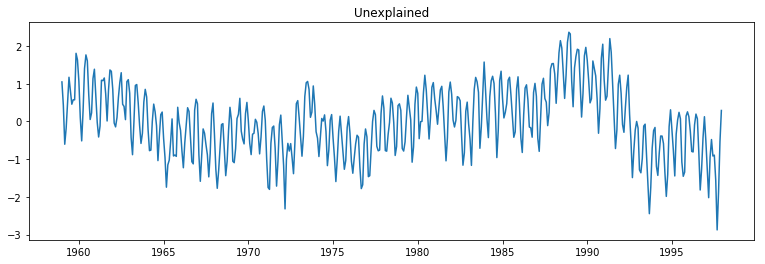

In [32]:
plt.figure(figsize=(13,4))

plt.plot(ts, ys - mf(ts))
plt.title('Unexplained')
plt.show()